In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
np.random.seed(555)
import pystan

In [16]:
stan_code = """
data {
    int N;
    int y;
}

parameters {
    real<lower=0> p;
}

transformed parameters {
    real p_skewed;
    p_skewed = 0.5*p + 0.25;
}

model {
    p ~ uniform(0, 1);
    y ~ binomial(N, p_skewed);
}
"""

In [17]:
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a54d06b996359366a7f68f417f4dbda2 NOW.


In [18]:
stan_data = {
    'N': 100,
    'y': 35
}

In [21]:
# op = stan_model.optimizing(data=stan_data)
# init_params = {'N': op.get('N'), 'y': op.get('y')}
# init_list = [init_params]*4

results = stan_model.sampling(data=stan_data, iter=1000, chains=4, seed=555, thin=1, warmup=100, n_jobs=-1)
results

Inference for Stan model: anon_model_a54d06b996359366a7f68f417f4dbda2.
4 chains, each with iter=1000; warmup=100; thin=1; 
post-warmup draws per chain=900, total post-warmup draws=3600.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p          0.21  3.4e-3   0.09   0.04   0.14    0.2   0.27   0.39    704   1.01
p_skewed   0.35  1.7e-3   0.05   0.27   0.32   0.35   0.38   0.44    704   1.01
lp__     -66.91    0.04   0.89 -69.63 -67.14 -66.55 -66.31 -66.26    504    1.0

Samples were drawn using NUTS at Mon Feb  5 22:18:42 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

(array([2.08860759e-01, 2.27848101e-01, 6.45569620e-01, 1.31012658e+00,
        2.79113924e+00, 4.00632911e+00, 7.12025316e+00, 1.50759494e+01,
        1.90253165e+01, 2.47025316e+01, 3.21075949e+01, 4.72405063e+01,
        4.38607595e+01, 4.59113924e+01, 4.45632911e+01, 5.15316456e+01,
        3.53734177e+01, 2.96012658e+01, 2.72468354e+01, 1.55696203e+01,
        1.15632911e+01, 6.24683544e+00, 4.57594937e+00, 1.97468354e+00,
        1.02531646e+00, 6.45569620e-01, 2.65822785e-01, 1.51898734e-01,
        3.79746835e-02, 7.59493671e-02]),
 array([0.1808    , 0.18290667, 0.18501333, 0.18712   , 0.18922667,
        0.19133333, 0.19344   , 0.19554667, 0.19765333, 0.19976   ,
        0.20186667, 0.20397333, 0.20608   , 0.20818667, 0.21029333,
        0.2124    , 0.21450667, 0.21661333, 0.21872   , 0.22082667,
        0.22293333, 0.22504   , 0.22714667, 0.22925333, 0.23136   ,
        0.23346667, 0.23557333, 0.23768   , 0.23978667, 0.24189333,
        0.244     ]),
 <a list of 30 Patch obj

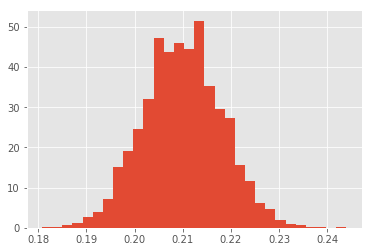

In [33]:
plt.hist(np.random.binomial(2500, 0.21, 25000)/2500, bins=30, normed=True)